# Beta Bank

### Introducción
  Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos. Por lo que crearé un modelo que ayude a predecir si un cliente dejará el banco pronto, para ello trabajaré con los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco. Es muy importante mejorar la calidad del modelo para lograr un valor F1 de al menos 0.59. Finalmente emitiré mis conclusiones generales respecto al modelo desarrollado.
### Objetivo
- El objetivo es crear un modelo que prediga si un cliente dejará el banco pronto.
### Etapas
1. Importar las librerías, cargar y preparar los datos.
2. Desarrollo del modelo sin tener en cuenta el desequilibrio.
3. Mejorar la calidad del modelo y corregir el desequilibrio de clases.
4. Pruebas finales al modelo.
5. Conclusiones generales.

## Importar las librerías, cargar y preparar los datos.

In [1]:
#Importar las librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve

In [2]:
#Cargando los datos
data_bank = pd.read_csv('/datasets/Churn.csv')
data_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
# información de los datos
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Descripción de los datos**
- RowNumber: índice de cadena de datos
- CustomerId: identificador de cliente único
- Surname: apellido
- CreditScore: valor de crédito
- Geography: país de residencia
- Gender: sexo
- Age: edad
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- Balance: saldo de la cuenta
- NumOfProducts: número de productos bancarios utilizados por el cliente
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
- EstimatedSalary: salario estimado
- Exited: El cliente se ha ido (1 - sí; 0 - no)

In [4]:
# descripción de los datos
data_bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#descripción de las variables categóricas
data_bank[['Surname','Geography', 'Gender']].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Conclusiones intermedias
En primera instancia importé las librerías, luego cargué los datos para comenzar con la preparación. Para ello lo primero es revisar los datos como lo hice anteriormente, así detecté que existen valores ausentes en la columna tenure los cuales abordaré a continuación. También convertiré todas las letras de los nombres de las columnas a minúsculas y revisaré si exiten duplicados.

In [6]:
# Conversión de todas las letras de las columnas a minúsculas
data_bank.columns= map(str.lower,data_bank.columns)
data_bank

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [7]:
# revisando los duplicados
data_bank.duplicated().sum()

0

In [8]:
percentage_nans = len(data_bank[data_bank['tenure'].isna() == True])/ len(data_bank) * 100
percentage_nans

9.09

In [9]:
# revisando el resto de características donde la columna tenure tiene valores ausentes
data_bank_sin_nans = data_bank.dropna()
data_bank_sin_nans

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


In [10]:
# Comprobación de la distribución con valores ausentes
data_bank_nan = data_bank[data_bank['tenure'].isna()]
data_nan_distribution = []
for column in data_bank_nan:
    if column != 'tenure':
        data_nan_distribution.append(data_bank_nan[column].value_counts(normalize= True))
data_nan_distribution  

[4097    0.0011
 5453    0.0011
 1301    0.0011
 1303    0.0011
 9496    0.0011
          ...  
 1244    0.0011
 663     0.0011
 845     0.0011
 2725    0.0011
 7668    0.0011
 Name: rownumber, Length: 909, dtype: float64,
 15695872    0.0011
 15711489    0.0011
 15678779    0.0011
 15735339    0.0011
 15629117    0.0011
              ...  
 15727251    0.0011
 15776404    0.0011
 15662758    0.0011
 15684248    0.0011
 15753213    0.0011
 Name: customerid, Length: 909, dtype: float64,
 Hughes         0.007701
 Meng           0.006601
 Thomson        0.005501
 Greco          0.005501
 Calabresi      0.005501
                  ...   
 Kudryashova    0.001100
 Parsons        0.001100
 Gaffney        0.001100
 Beneventi      0.001100
 Rogova         0.001100
 Name: surname, Length: 665, dtype: float64,
 850    0.025303
 651    0.009901
 630    0.009901
 652    0.008801
 706    0.008801
          ...   
 500    0.001100
 683    0.001100
 503    0.001100
 504    0.001100
 359    0.001100
 N

In [11]:
# Comprobación de la distribución sin valores ausentes
data_sin_nan_distribution = []
for column in data_bank:
    if column != 'tenure':
        data_sin_nan_distribution.append(data_bank.dropna()[column].value_counts(normalize= True))
data_sin_nan_distribution 

[2049    0.00011
 6822    0.00011
 669     0.00011
 6814    0.00011
 4767    0.00011
          ...   
 1322    0.00011
 7465    0.00011
 5416    0.00011
 9510    0.00011
 2047    0.00011
 Name: rownumber, Length: 9091, dtype: float64,
 15646720    0.00011
 15758035    0.00011
 15796015    0.00011
 15768270    0.00011
 15785042    0.00011
              ...   
 15762762    0.00011
 15745433    0.00011
 15814757    0.00011
 15635776    0.00011
 15812607    0.00011
 Name: customerid, Length: 9091, dtype: float64,
 Smith       0.00330
 Martin      0.00297
 Scott       0.00286
 Walker      0.00275
 Genovese    0.00275
              ...   
 Culbreth    0.00011
 Ermakova    0.00011
 Burson      0.00011
 Buchanan    0.00011
 Laney       0.00011
 Name: surname, Length: 2787, dtype: float64,
 850    0.02310
 678    0.00660
 655    0.00561
 705    0.00528
 683    0.00517
         ...   
 382    0.00011
 351    0.00011
 367    0.00011
 383    0.00011
 376    0.00011
 Name: creditscore, Length: 458,

### Conclusiones intermedias
Observo diferencias significativas en la distribución de los datos de la tabla con valores ausentes y la que no tiene; por lo tanto creo que tomaré en cuenta los valores de las columnas `balance`, `geography` y `age` para rellenar los valores ausentes en `tenure` ya que en estas es donde más evidencio dichas diferencias.

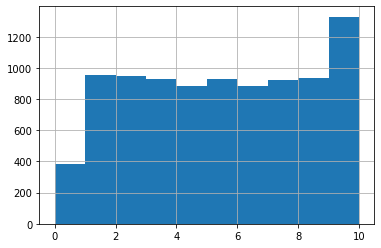

In [12]:
data_bank_sin_nans['tenure'].hist()
plt.show()

In [13]:
# Examina los valores medios de ternure en función de los factores que identificaste
median_nan = data_bank_sin_nans.pivot_table(index=['balance','age','geography'],values='tenure',aggfunc='median')
median_nan = median_nan.astype('int')
median_nan

tenure
balance   age geography        
0.00      18  France          6
              Spain           5
          19  France          4
              Spain           6
          20  France          6
...                         ...
216109.88 58  Spain           5
221532.80 40  Spain           3
222267.63 42  Spain           9
238387.56 57  France          3
250898.09 38  Spain           3

[5933 rows x 1 columns]

In [14]:
#  Escribe una función que usaremos para completar los valores ausentes
def median_income(row):
    balance = row['balance']
    age = row['age']
    geography = row["geography"]
    tenure = row['tenure']
    try:
        if pd.isna(tenure):
            return median_nan['tenure'][balance][age][geography]
        return tenure
    except:
        return data_bank['tenure'].median().astype('int')

In [15]:
data_bank['tenure'] = data_bank.apply(median_income, axis= 1)
data_bank

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [16]:
# validando que no queden valores ausentes
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Conclusiones
- Para abordar los valores ausentes revisé las características de los clientes donde hay valores ausentes en busca de un patrón, al no encontrarlo considero que la mejor forma de abordarlos es creando una tabla pivot con la mediana de `tenure` usando las columnas mencionadas anteriormente, utilicé la mediana porque el sesgo es negativo esto significa que pueden existir valores atípicos. Luego de terminada la exploración y preparación de los datos pasaré a la siguiente etapa: 'desarrollo del modelo sin tener en cuenta el desequilibrio'.

## Desarrollo del modelo sin tener en cuenta el desequilibrio.

Considero que puedo excluir del modelo las siguientes características del cliente: 'rownumber', 'customerid' y 'surname' 

In [17]:
data_bank = data_bank.drop(['rownumber', 'customerid', 'surname'], axis=1)

In [18]:
#codificación y estandarización de datos
data_bank = pd.get_dummies(data_bank, drop_first=True) #transformar características categóricas en numéricas
target = data_bank['exited'] # objetivo
features = data_bank.drop(['exited'], axis=1) # características
features_train, features_valid, target_train, target_valid = train_test_split( 
    features, target, test_size=0.2, random_state=12345)
features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345) # división de los conjuntos en entrenamiento,validación y prueba 

numeric = ["creditscore", "age", "tenure", "balance", "estimatedsalary"]

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) # estandarizar los datos numéricos

/tmp/ipykernel_59/3780010375.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[numeric] = scaler.transform(features_valid[numeric]) # estandarizar los datos numéricos
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [19]:
# Comprobando la división de los conjuntos
features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

### Conclusiones intermedias
Lo primero que hice fue transformar las características categóricas a numéricas con la técnica One-Hot Encoding (OHE) y teniendo en cuenta evitar la trampa dummy. Luego pasé a escalado de características estandarizando los datos numéricos porque todas las características deben considerarse igualmente importantes antes de la ejecución del algoritmo.

In [20]:
#examinando el equilibrio de clases
frequency = target.value_counts(normalize=True)
frequency

0    0.7963
1    0.2037
Name: exited, dtype: float64

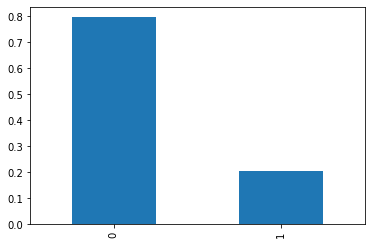

In [21]:
#graficando el equilibrio de clases
frequency.plot(kind='bar')
plt.show()

Al examinar el equilibrio de clases observo que existe desequilibrio, ya que su proporción está lejos de 1:1, es de 2:8. El equilibrio de clases se observa si su número es aproximadamente igual.

In [22]:
#Desarrollo del modelo árbol de decisiones
best_model_tree = None
best_result_tree = 0
list_criterion = {"gini", "entropy"}
for i in range(1,100, 10):
    for split in range(2,20,10):
            for leaf in range(1,20,10):
                for ctn in list_criterion:
                    model = DecisionTreeClassifier(random_state=12345, max_depth= i, criterion = ctn, min_samples_split = split, min_samples_leaf = leaf)
                    model.fit(features_train, target_train)
                    predictions_valid = model.predict(features_valid)
                    accuracy_tree = accuracy_score(target_valid, predictions_valid)
                    result = f1_score(target_valid, predictions_valid) 
                    if result > best_result_tree:
                        best_model_tree = model
                        best_result_tree = result
best_model_tree, best_result_tree, accuracy_tree

(DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=11,
                        random_state=12345),
 0.5529573590096286,
 0.8375)

In [23]:
#Desarrollo del modelo bosque aleatorio
best_model_forest = None
best_result_forest = 0
list_criterion = {"gini", "entropy"}
for n in range(1,100,10):
    for i in range(1,100,10):
        for ctn in list_criterion:
            for split in range(2, 20,10):
                for leaf in range(1, 20,10):
                    model = RandomForestClassifier(random_state=12345, max_depth= i, criterion = ctn, min_samples_split = split, min_samples_leaf = leaf, n_estimators = n)
                    model.fit(features_train, target_train)
                    predictions_valid = model.predict(features_valid)
                    accuracy_forest = accuracy_score(target_valid, predictions_valid)
                    result = f1_score(target_valid, predictions_valid)
                    if result > best_result_forest:
                        best_model_forest = model
                        best_result_forest = result
best_model_forest, best_result_forest, accuracy_forest

(RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_split=12,
                        n_estimators=21, random_state=12345),
 0.5773195876288659,
 0.856)

In [24]:
#Desarrollo del modelo regresión logística
model = LogisticRegression(random_state=12345, penalty = 'l2')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_regression = accuracy_score(target_valid, predictions_valid)
f1_regression = f1_score(target_valid, predictions_valid)   
f1_regression, accuracy_regression

(0.3012259194395797, 0.8005)

In [25]:
#creando un modelo constante que predice cero
target_pred_constant = pd.Series(0, index=target.index)
accuracy_score(target, target_pred_constant)

0.7963

**A continuación procederé a hallar el AUC-ROC para cada modelo.**

In [26]:
# Calculando el AUC-ROC
model = DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=11,
                        random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_tree = roc_auc_score(target_valid,probabilities_one_valid)

auc_roc_tree

0.8046975379315171

In [27]:
# Calculando el AUC-ROC
model = RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_split=12,
                        n_estimators=21, random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_forest = roc_auc_score(target_valid,probabilities_one_valid)

auc_roc_forest

0.862802622117078

In [28]:
# Calculando el AUC-ROC
model = LogisticRegression(random_state=12345, penalty = 'l2')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_regression = roc_auc_score(target_valid,probabilities_one_valid)

auc_roc_regression

0.7582045376382187

### Conclusiones
Luego de entrenar los modelos sin tener el cuenta el desequilibrio, obtuve una exactitud aproximada de 0.8, realicé también una prueba de cordura con un modelo constante que predice la clase "0" para cualquier observación y la exactitud es de 0.796; ambas son muy parecidas esto significa que existe un fuerte desequilibrio de clases lo que afecta nuestro modelo. Además el valor F1 aún no supera el 0.59 en ninguno de los modelos. Hallé también los valores de AUC-ROC para compararlos más adelante. A continuación trabajaré para mejorar la calidad de los modelos y corregir dicho desequilibrio.

## Mejorar la calidad del modelo y corregir el desequilibrio de clases.

In [29]:
# aplicando el ajuste de peso de clase para la regresión logística
model = LogisticRegression(random_state=12345, penalty = 'l2',class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.5016778523489932


'auc_roc: 0.7638397370141036'

In [30]:
# aplicando el ajuste de peso de clase para el árbol de decisiones
model = DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=11,
                        random_state=12345,class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.5571293673276677


'auc_roc: 0.8000419848407926'

In [31]:
# aplicando el ajuste de peso de clase para el bosque aleatorio
model =  RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_split=12,
                        n_estimators=21, random_state=12345,class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.600997506234414


'auc_roc: 0.8529860601395625'

In [32]:
# aplicando el sobremuestreo para la regresión logística
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

model =LogisticRegression(random_state=12345, penalty = 'l2', solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.5045643153526971


'auc_roc: 0.763853136431378'

In [33]:
# aplicando el sobremuestreo para el árbol de decisiones
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

model =DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=11,
                        random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.54320987654321


'auc_roc: 0.7772518092935381'

In [34]:
# aplicando el sobremuestreo para el bosque aleatorio
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

model = RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_split=12,
                        n_estimators=21, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.6113033448673587


'auc_roc: 0.8526689405974055'

In [35]:
# aplicando el submuestreo para la regresión logística
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

model =LogisticRegression(random_state=12345, penalty = 'l2', solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.4970906068162926


'auc_roc: 0.7666878575969485'

In [36]:
# aplicando el submuestreo para el bosque aleatorio
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

model = RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_split=12,
                        n_estimators=21, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.609090909090909


'auc_roc: 0.8589383790576042'

In [37]:
# aplicando el submuestreo para el árbol de decisiones
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

model = DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=11,
                        random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f'auc_roc: {roc_auc_score(target_valid,probabilities_one_valid)}'

F1: 0.5507246376811594


'auc_roc: 0.8114865760171274'

### Conclusiones
Para corregir el desequilibrio de los datos ocupé tres técnicas: ajuste de peso de clase, sobremuestreo y submuestreo. Puede lograr un valor de F1 por encima de 0.59 con las tres técnicas con el bosque aleatorio y con los siguientes parámetros: criterion='entropy', max_depth=31, min_samples_split=12, n_estimators=21, random_state=12345; pero el de mayor valor fue con el sobremuestreo. Además el mayor valor de AUC-ROC también lo conseguí con el bosque aleatorio.

## Pruebas finales al modelo.

In [38]:
target = data_bank['exited'] # objetivo
features = data_bank.drop(['exited'], axis=1) # características
features_train, features_test, target_train, target_test = train_test_split( 
    features, target, test_size=0.25, random_state=12345)

In [39]:
#Hallar f1 para el conjunto de prueba.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)
model = RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_split=12,
                        n_estimators=21, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1_result = f1_score(target_test, predicted_test)
f1_result

0.6328638497652582

0.8544372309814272


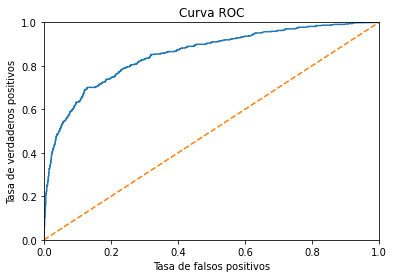

In [40]:
#Gráfico con valor de AUC-ROC
model = RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_split=12,
                        n_estimators=21, random_state=12345)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print(roc_auc_score(target_test,probabilities_one_test))
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')

plt.show()

### Conclusiones
Antes de concluir realicé las pruebas finales al modelo, el valor de f1 cumple con las expectativas, su valor es 0.63. Además grafiqué la Curva ROC donde se evidencia lo alta que es la curva, por lo tanto mayor será el valor de la tasa de verdaderos positivos  y mejor será la calidad del modelo.

## Conclusiones generales.

- A modo de conclusión general podemos decir que el modelo bosque aleatorio con los parámetros (criterion='entropy', max_depth=31, min_samples_split=12,n_estimators=21, random_state=12345) aplicándole el sobremuestreo fue el que obtuvo mayor valor de F1(0.63) y AUC-ROC(0.85). Para conseguir esto fue necesario primeramente revisar y preparar los datos, ahí imputé los valores ausentes y cambié todas las letras de los nombres de las columnas a minúsculas. Luego entrené los modelos sin tener en cuenta el equilibrio y analicé que existía un fuerte desequilibrio en los datos. En la posterior etapa mejoré la calidad del modelo y apliqué tres técnicas para corregir el desequilibrio: ajuste de peso de clase, sobremuestreo y submuestreo. Finalmente realicé las pruebas finales al modelo las cuales fueron satifactorias con el bosque aleatorio aplicando el sobremuestreo y grafiqué la curva ROC.